In [3]:
import pandas as pd 
import sklearn 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [4]:
data=pd.read_csv('Train.csv')
data.head()
data['Client Retention Flag']= data['Client Retention Flag'].map({'Yes': 1, 'No': 0})

In [5]:
data_encoded=pd.get_dummies(data)
data_encoded.head()

,Client ID,Company ID,Flag 2,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,...,"Flag 6_Banking, Finance & Ins",Flag 6_Education,Flag 6_Energy & Utilities,Flag 6_Government,Flag 6_Healthcare,Flag 6_Manufacturing,Flag 6_Retail,Flag 6_Services,Flag 6_Technology and Telecom,Flag 6_Unknown
0,10004519380,6294937,2,8,24,16,20,52,0,14,...,0,0,0,0,0,1,0,0,0,0
1,10004521476,6293796,7,6,9,2,0,18,27,0,...,0,0,0,1,0,0,0,0,0,0
2,10004515403,6293911,2,15,1,11,12,0,11,13,...,0,0,0,0,0,0,0,0,1,0
3,10004511478,6293048,2,15,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
4,10004516858,6294364,7,9,16,14,48,6,6,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
#plt.scatter(data['Flag 2'],data['Client Retention Flag'],c=data['Flag 2'])

In [6]:
data_encoded=data_encoded.drop(columns='Client ID')

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [7]:
pd.get_dummies(data_encoded,drop_first=True)

,Company ID,Flag 2,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,Activity 1 Time Period 5,...,"Flag 6_Banking, Finance & Ins",Flag 6_Education,Flag 6_Energy & Utilities,Flag 6_Government,Flag 6_Healthcare,Flag 6_Manufacturing,Flag 6_Retail,Flag 6_Services,Flag 6_Technology and Telecom,Flag 6_Unknown
0,6294937,2,8,24,16,20,52,0,14,94,...,0,0,0,0,0,1,0,0,0,0
1,6293796,7,6,9,2,0,18,27,0,26,...,0,0,0,1,0,0,0,0,0,0
2,6293911,2,15,1,11,12,0,11,13,5,...,0,0,0,0,0,0,0,0,1,0
3,6293048,2,15,1,0,0,0,2,0,10,...,0,0,0,0,0,0,0,0,1,0
4,6294364,7,9,16,14,48,6,6,0,8,...,1,0,0,0,0,0,0,0,0,0
5,6292276,7,3,10,6,30,52,0,0,36,...,0,1,0,0,0,0,0,0,0,0
6,6294388,2,16,0,0,2,0,2,0,4,...,0,0,0,1,0,0,0,0,0,0
7,6292068,2,3,0,6,14,0,2,2,0,...,0,1,0,0,0,0,0,0,0,0
8,6293710,2,7,14,28,22,38,16,6,0,...,0,0,0,1,0,0,0,0,0,0
9,6293762,2,3,64,144,212,220,96,98,22,...,0,1,0,0,0,0,0,0,0,0


In [9]:
ohe=OneHotEncoder(sparse=False)
le=LabelEncoder()

In [10]:
ohe

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [8]:
data_encoded=pd.get_dummies(data_encoded,columns=['Flag 2','Flag 5'])

In [11]:
data_encoded.head()

,Company ID,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,Activity 1 Time Period 5,Activity 1 Time Period 4,Activity 1 Time Period 3,...,Flag 5_12,Flag 5_13,Flag 5_14,Flag 5_15,Flag 5_16,Flag 5_17,Flag 5_18,Flag 5_19,Flag 5_20,Flag 5_21
0,6294937,24,16,20,52,0,14,94,44,16,...,0,0,0,0,0,0,0,0,0,0
1,6293796,9,2,0,18,27,0,26,2,6,...,0,0,0,0,0,0,0,0,0,0
2,6293911,1,11,12,0,11,13,5,6,11,...,0,0,0,1,0,0,0,0,0,0
3,6293048,1,0,0,0,2,0,10,1,0,...,0,0,0,1,0,0,0,0,0,0
4,6294364,16,14,48,6,6,0,8,18,12,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Y=data_encoded['Client Retention Flag']
X=data_encoded.drop(columns='Client Retention Flag')

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state=2)

In [14]:
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=400,
                        learning_rate = 0.1)

In [15]:
eval_set = [(train_X, train_Y), (test_X, test_Y)]
model.fit(train_X, train_Y.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.247946	validation_0-logloss:0.663853	validation_1-error:0.262774	validation_1-logloss:0.6656
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.248403	validation_0-logloss:0.639558	validation_1-error:0.262318	validation_1-logloss:0.642909
[2]	validation_0-error:0.239732	validation_0-logloss:0.619217	validation_1-error:0.253193	validation_1-logloss:0.624162
[3]	validation_0-error:0.236538	validation_0-logloss:0.60269	validation_1-error:0.250456	validation_1-logloss:0.608652
[4]	validation_0-error:0.243535	validation_0-logloss:0.588185	validation_1-error:0.25365	validation_1-logloss:0.595481
[5]	validation_0-error:0.23669	validation_0-logloss:0.576365	validation_1-error:0.251825	validation_1-logloss:0.584689
[6]	validation_0-error:0.236386	validation_0-logloss:0.565338	validation_1-error:0.249544	validation_1-logloss:0.574345


[67]	validation_0-error:0.152723	validation_0-logloss:0.379666	validation_1-error:0.180201	validation_1-logloss:0.42892
[68]	validation_0-error:0.152723	validation_0-logloss:0.378866	validation_1-error:0.179288	validation_1-logloss:0.428852
[69]	validation_0-error:0.152875	validation_0-logloss:0.37841	validation_1-error:0.178376	validation_1-logloss:0.428773
[70]	validation_0-error:0.152114	validation_0-logloss:0.377317	validation_1-error:0.178832	validation_1-logloss:0.428217
[71]	validation_0-error:0.15181	validation_0-logloss:0.376543	validation_1-error:0.177007	validation_1-logloss:0.428209
[72]	validation_0-error:0.149833	validation_0-logloss:0.373348	validation_1-error:0.176095	validation_1-logloss:0.426009
[73]	validation_0-error:0.148007	validation_0-logloss:0.369866	validation_1-error:0.175639	validation_1-logloss:0.423198
[74]	validation_0-error:0.147399	validation_0-logloss:0.36929	validation_1-error:0.175639	validation_1-logloss:0.423135
[75]	validation_0-error:0.146638	val

[135]	validation_0-error:0.109066	validation_0-logloss:0.304806	validation_1-error:0.152828	validation_1-logloss:0.38354
[136]	validation_0-error:0.108914	validation_0-logloss:0.304158	validation_1-error:0.153285	validation_1-logloss:0.383128
[137]	validation_0-error:0.108914	validation_0-logloss:0.303316	validation_1-error:0.153741	validation_1-logloss:0.382885
[138]	validation_0-error:0.108305	validation_0-logloss:0.301851	validation_1-error:0.153285	validation_1-logloss:0.38118
[139]	validation_0-error:0.108001	validation_0-logloss:0.299862	validation_1-error:0.15146	validation_1-logloss:0.37952
[140]	validation_0-error:0.108153	validation_0-logloss:0.299433	validation_1-error:0.151916	validation_1-logloss:0.3795
[141]	validation_0-error:0.107697	validation_0-logloss:0.299245	validation_1-error:0.151916	validation_1-logloss:0.379531
[142]	validation_0-error:0.106632	validation_0-logloss:0.297359	validation_1-error:0.151916	validation_1-logloss:0.378278
[143]	validation_0-error:0.106

[203]	validation_0-error:0.085945	validation_0-logloss:0.254003	validation_1-error:0.141423	validation_1-logloss:0.353616
[204]	validation_0-error:0.086401	validation_0-logloss:0.252708	validation_1-error:0.140967	validation_1-logloss:0.352579
[205]	validation_0-error:0.086097	validation_0-logloss:0.252529	validation_1-error:0.140967	validation_1-logloss:0.352466
[206]	validation_0-error:0.086249	validation_0-logloss:0.252197	validation_1-error:0.142336	validation_1-logloss:0.352432
[207]	validation_0-error:0.086705	validation_0-logloss:0.251712	validation_1-error:0.142792	validation_1-logloss:0.352269
[208]	validation_0-error:0.085793	validation_0-logloss:0.251452	validation_1-error:0.142336	validation_1-logloss:0.352198
[209]	validation_0-error:0.085032	validation_0-logloss:0.250227	validation_1-error:0.142336	validation_1-logloss:0.351201
[210]	validation_0-error:0.085032	validation_0-logloss:0.250091	validation_1-error:0.142336	validation_1-logloss:0.351331
[211]	validation_0-error

[271]	validation_0-error:0.070885	validation_0-logloss:0.222072	validation_1-error:0.135949	validation_1-logloss:0.339016
[272]	validation_0-error:0.070581	validation_0-logloss:0.221649	validation_1-error:0.135949	validation_1-logloss:0.339105
[273]	validation_0-error:0.070429	validation_0-logloss:0.2207	validation_1-error:0.134124	validation_1-logloss:0.33797
[274]	validation_0-error:0.070429	validation_0-logloss:0.220479	validation_1-error:0.134124	validation_1-logloss:0.33802
[275]	validation_0-error:0.070429	validation_0-logloss:0.220299	validation_1-error:0.133212	validation_1-logloss:0.338053
[276]	validation_0-error:0.070125	validation_0-logloss:0.219987	validation_1-error:0.132755	validation_1-logloss:0.3378
[277]	validation_0-error:0.069821	validation_0-logloss:0.219643	validation_1-error:0.134124	validation_1-logloss:0.337779
[278]	validation_0-error:0.069364	validation_0-logloss:0.21908	validation_1-error:0.133668	validation_1-logloss:0.337293
[279]	validation_0-error:0.0687

[339]	validation_0-error:0.05826	validation_0-logloss:0.194339	validation_1-error:0.128193	validation_1-logloss:0.327593
[340]	validation_0-error:0.057803	validation_0-logloss:0.194127	validation_1-error:0.12865	validation_1-logloss:0.327595
[341]	validation_0-error:0.057499	validation_0-logloss:0.193639	validation_1-error:0.12865	validation_1-logloss:0.327453
[342]	validation_0-error:0.056891	validation_0-logloss:0.193204	validation_1-error:0.129562	validation_1-logloss:0.327697
[343]	validation_0-error:0.056891	validation_0-logloss:0.192957	validation_1-error:0.130474	validation_1-logloss:0.327467
[344]	validation_0-error:0.056891	validation_0-logloss:0.192472	validation_1-error:0.130018	validation_1-logloss:0.327399
[345]	validation_0-error:0.056891	validation_0-logloss:0.192338	validation_1-error:0.130474	validation_1-logloss:0.327462
[346]	validation_0-error:0.056282	validation_0-logloss:0.192127	validation_1-error:0.130474	validation_1-logloss:0.327415
[347]	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

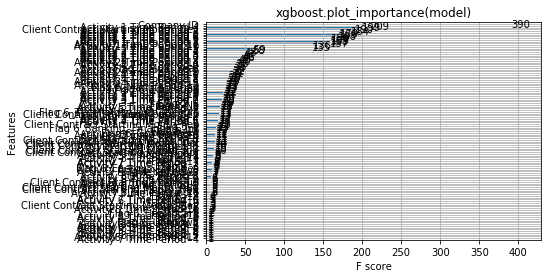

In [16]:
xgb.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

In [22]:
feature_importance = pd.Series(model.feature_importances_,index=train_X.columns.values[0:]).sort_values(ascending=False)
print(feature_importance)

Activity 1 Time Period 0              0.039712
Client Contract Starting Month_Dec    0.035226
Activity 7 Time Period  4             0.019748
Activity 4 Time Period 0              0.019590
Activity 1 Time Period 1              0.018944
Activity 1 Time Period 4              0.018454
Activity 1 Time Period 2              0.018415
Activity 1 Time Period 6              0.016877
Flag 6_Government                     0.015833
Activity 1 Time Period 3              0.015828
Activity 1 Time Period 5              0.015770
Flag 2_6                              0.015244
Flag 6_Energy & Utilities             0.014276
Activity 1 Time Period 9              0.014239
Client Contract Starting Month_Sep    0.014196
Activity 1 Time Period 7              0.014054
Activity 1 Time Period 8              0.013876
Activity 8 Time Period 9              0.013102
Flag 6_Banking, Finance & Ins         0.011599
Flag 2_4                              0.011330
Activity 1 Time Period 11             0.011247
Activity 1 Ti

In [24]:
y_pred=model.predict(test_X)
y_pred[:20]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [25]:
for i in range(y_pred.size):
    y_pred[i]=round(y_pred[i])

In [26]:
model.score(test_X,test_Y)

0.8704379562043796

In [30]:
d_train = xgb.DMatrix(train_X, label=train_Y)
d_test = xgb.DMatrix(test_X, label=test_Y)
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": 0.5,
    "eval_metric": "mae"
}
model2 = xgb.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-mae:0.498414
Will train until test-mae hasn't improved in 20 rounds.
[100]	test-mae:0.395952
[200]	test-mae:0.348951
[300]	test-mae:0.322482
[400]	test-mae:0.305182
[500]	test-mae:0.292599
[600]	test-mae:0.281968
[700]	test-mae:0.272581
[800]	test-mae:0.26471
[900]	test-mae:0.25738
[1000]	test-mae:0.251093
[1100]	test-mae:0.2461
[1200]	test-mae:0.24143
[1300]	test-mae:0.237143
[1400]	test-mae:0.233497
[1500]	test-mae:0.229895
[1600]	test-mae:0.227059
[1700]	test-mae:0.223676
[1800]	test-mae:0.220558
[1900]	test-mae:0.21837
[2000]	test-mae:0.216227
[2100]	test-mae:0.213766
[2200]	test-mae:0.211578
[2300]	test-mae:0.209513
[2400]	test-mae:0.207489
[2500]	test-mae:0.205793
[2600]	test-mae:0.204117
[2700]	test-mae:0.202418
[2800]	test-mae:0.200904
[2900]	test-mae:0.19952
[3000]	test-mae:0.198276
[3100]	test-mae:0.196894
[3200]	test-mae:0.195767
[3300]	test-mae:0.194657
[3400]	test-mae:0.193505
[3500]	test-mae:0.192567
[3600]	test-mae:0.191571
[3700]	test-mae:0.190643
[3800]	test-m

In [150]:
y_pred=model2.predict(d_test)
y_pred

array([0.8572127 , 0.9152124 , 0.94548005, ..., 0.7381859 , 0.9805925 ,
       0.2185165 ], dtype=float32)

In [39]:
y_pred=model2.predict(d_train)
y_pred

array([0.00228029, 0.9842253 , 0.9813789 , ..., 0.9902114 , 0.0301995 ,
       0.14070112], dtype=float32)

In [41]:
for i in range(y_pred.size):
    y_pred[i]=round(y_pred[i])

In [34]:
from sklearn import metrics 

In [44]:
metrics.accuracy_score(train_Y,y_pred)

0.9981746273197445

In [45]:
y_pred=model.predict(test_X)
metrics.accuracy_score(test_Y,y_pred)

0.8704379562043796

In [49]:
xgb_fea_imp=pd.DataFrame(list(model2.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                                 feature  importance
8                            Company ID       18587
1              Activity 1 Time Period 1        7427
2              Activity 1 Time Period 2        7284
3              Activity 1 Time Period 4        7047
0              Activity 1 Time Period 0        6576
4              Activity 1 Time Period 3        6453
27             Activity 1 Time Period 6        5842
18             Activity 1 Time Period 7        5743
14             Activity 1 Time Period 5        5626
6             Activity 1 Time Period 11        5399
28             Activity 1 Time Period 9        5367
26             Activity 1 Time Period 8        5320
22            Activity 1 Time Period 10        5295
11   Client Contract Starting Month_Dec        3759
37             Activity 2 Time Period 1        1793
67                    Flag 1_Multi Year        1671
39             Activity 2 Time Period 4        1602
9              Activity 2 Time Period 2        1592
73         

In [ ]:
#A4=Activity4TimePeriod0+Activity4TimePeriod1+Activity4TimePeriod2+Activity4TimePeriod3+Activity4TimePeriod4+Activity4TimePeriod5+Activity4TimePeriod6+Activity4TimePeriod7+Activity4TimePeriod8+Activity4TimePeriod9+Activity4TimePeriod10;
